In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


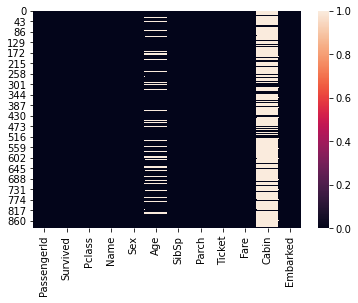

In [6]:
#Null values are present in age and cabin
sns.heatmap(df.isnull())

In [7]:
#replace the missing age with mean value
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy="mean")
df['Age']=imp1.fit_transform(df['Age'].values.reshape(-1,1))

In [8]:
#cabin column is not required, can be dropped
df.drop("Cabin",axis=1,inplace=True)
#Name, Ticket column can be removed, it has text
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [9]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


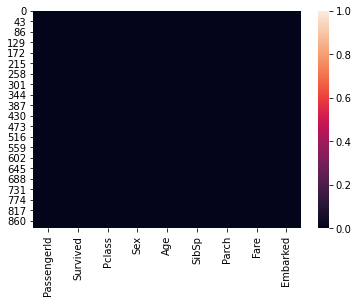

In [10]:
#No null value
sns.heatmap(df.isnull())

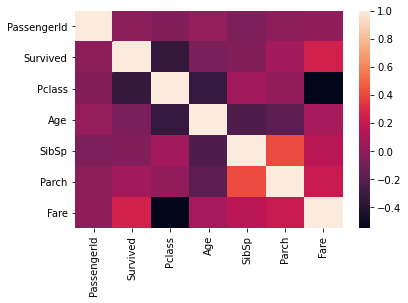

In [11]:
#Pclass is negatively corelated with Fare(can be removed), rest all are neutral corelated
dfcor=df.corr()
sns.heatmap(dfcor)

In [12]:
#Outliers(diff between 75 and max is high)Skewness(mean>median in fare) might be present
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#Need to change Sex and Embark with numeric value
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [14]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


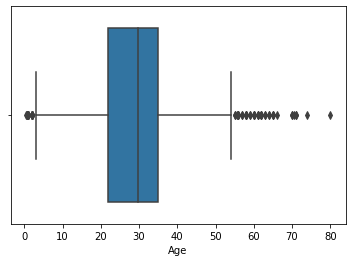

In [15]:
#Boxplot for outliers
sns.boxplot(df['Age'])

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

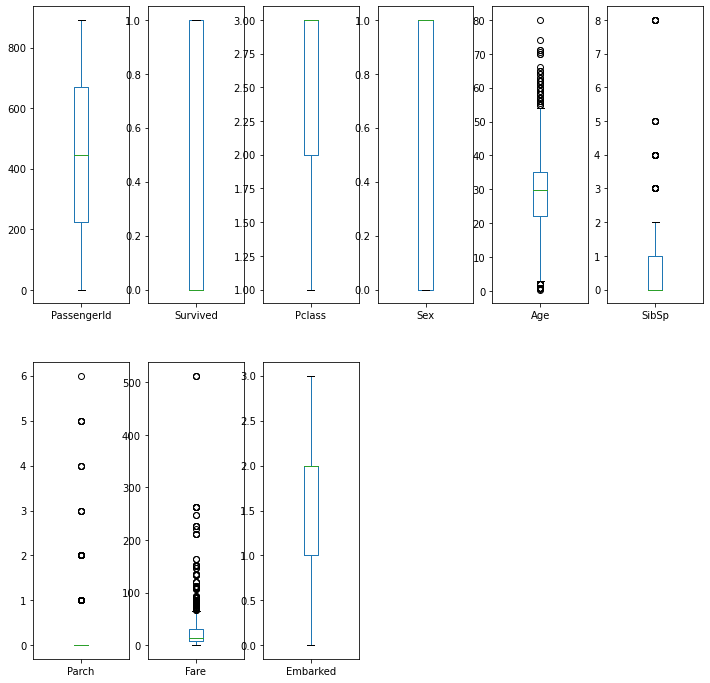

In [16]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(12,12))

In [17]:
#outlier (Removed all columns with text Name and ticket)
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [18]:
df.shape

(891, 9)

In [19]:
#Outlier values has been removed
df_new.shape

(820, 9)

In [20]:
#Skewness-Sibsp,fare and parch are highly skewed.rest all moderately skewed
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

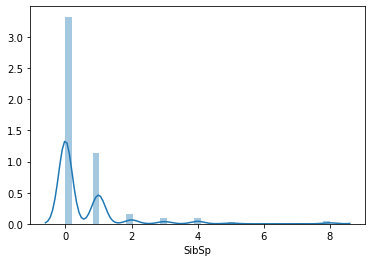

In [45]:
sns.distplot(df['SibSp'])

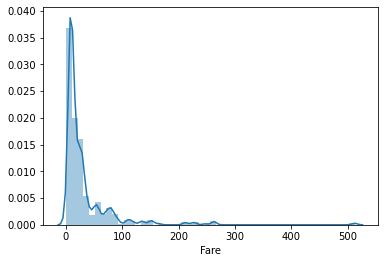

In [23]:
sns.distplot(df['Fare'])

In [41]:
# remove Skew
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df,method='yeo-johnson')

In [42]:
new=pd.DataFrame(pt,columns=df.columns)

In [43]:
new.skew()

PassengerId   -0.283201
Survived       0.478523
Pclass        -0.441438
Sex           -0.618921
Age            0.064420
SibSp          0.808608
Parch          1.228795
Fare          -0.040329
Embarked      -0.861651
dtype: float64

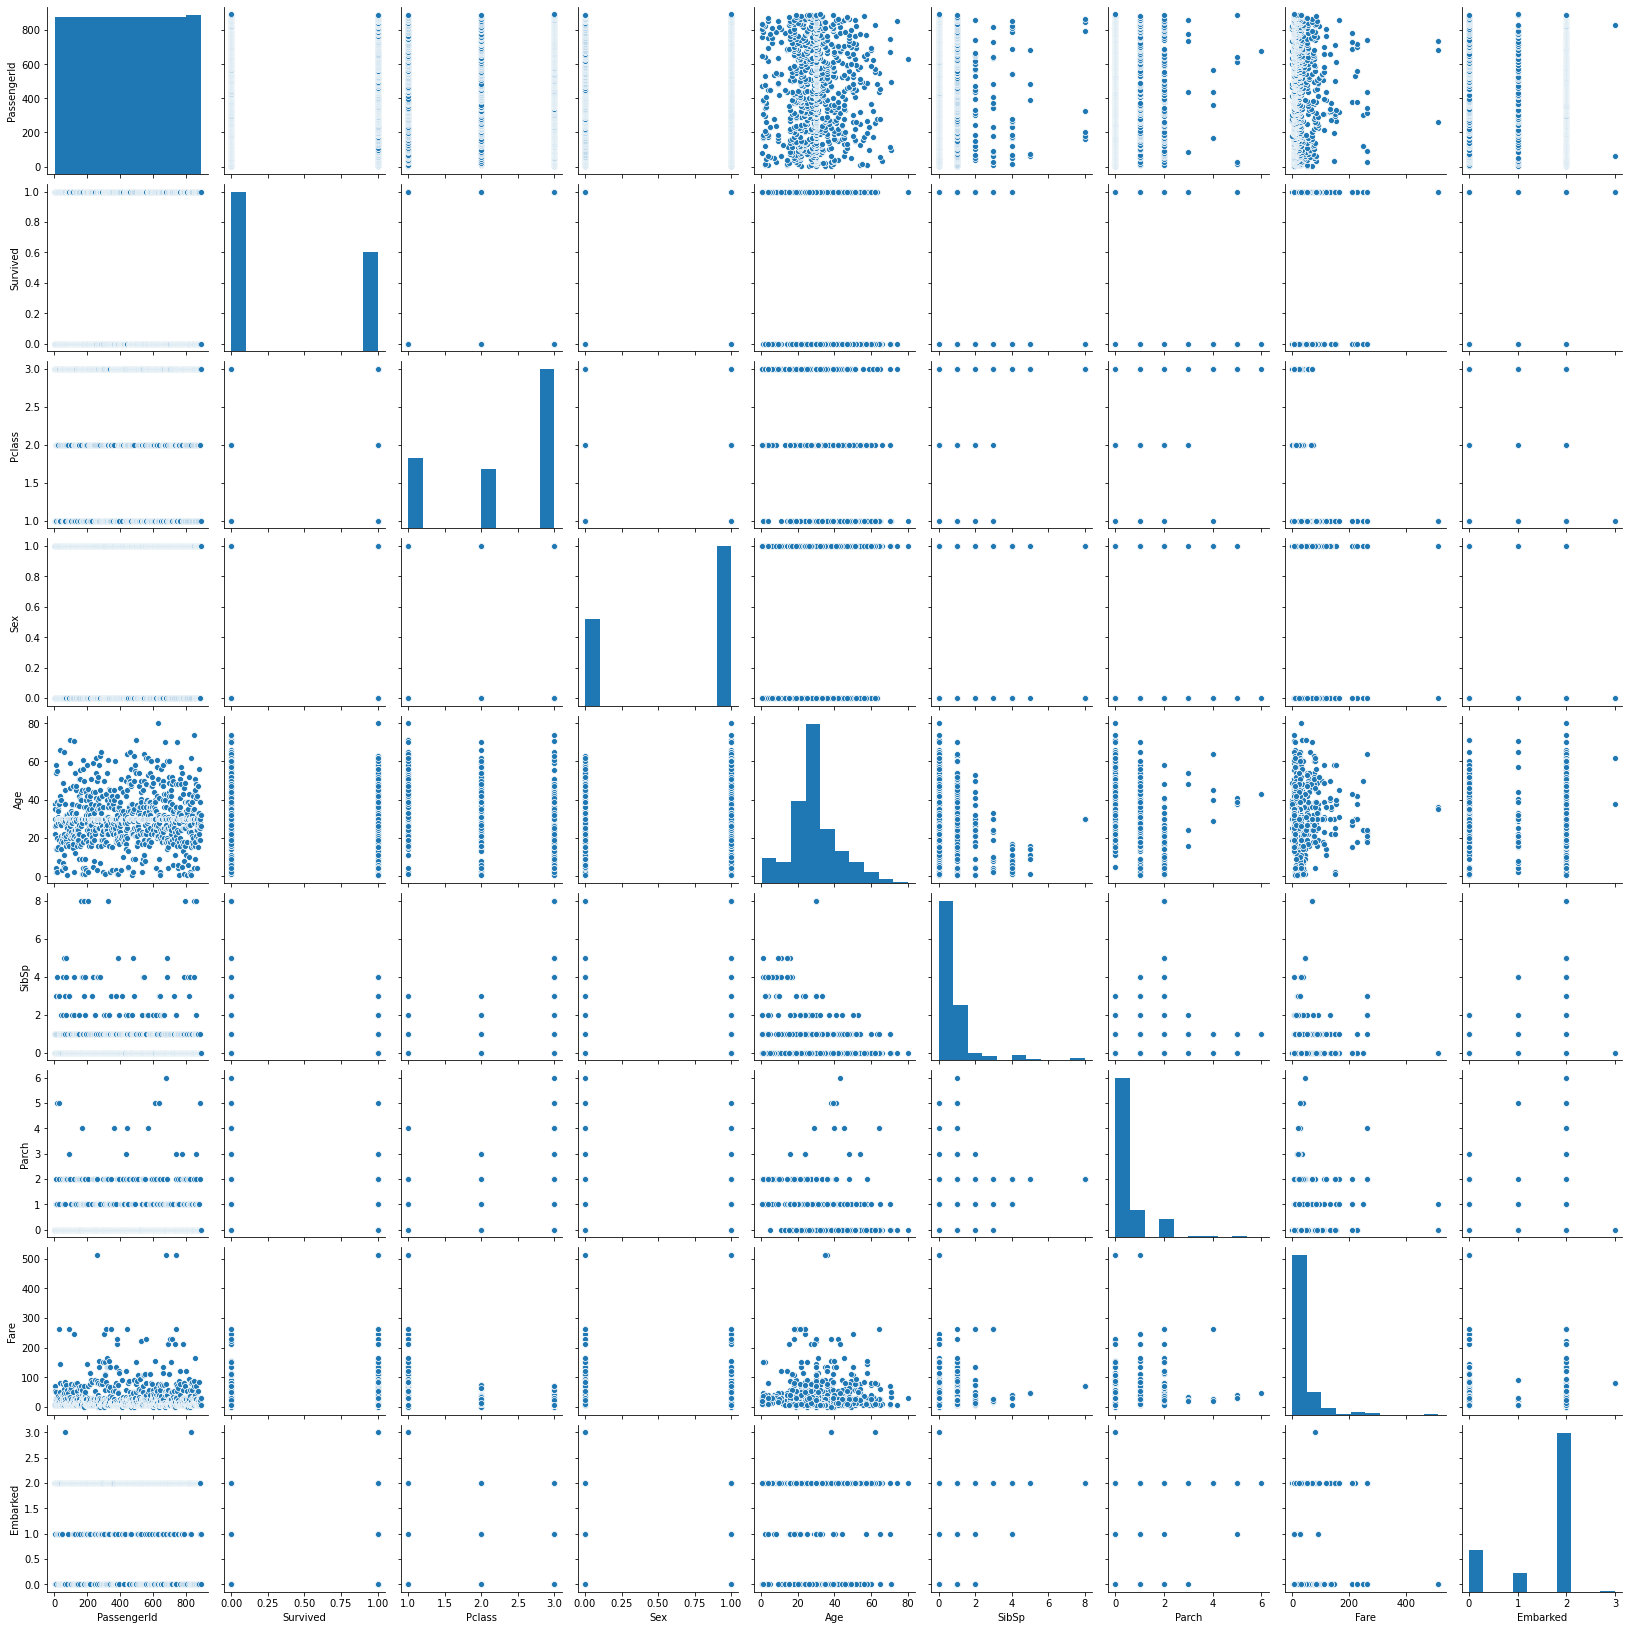

In [24]:
sns.pairplot(df)

In [25]:
# xtrain and Ytrain
x=df.iloc[ :,0:-1]
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [26]:
x.shape

(891, 8)

In [27]:
y=df.iloc[ :,-1]
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [28]:
y.shape

(891,)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [30]:
x_train.shape

(596, 8)

In [31]:
x_test.shape

(295, 8)

In [32]:
y_train.shape

(596,)

In [33]:
y_test.shape

(295,)

In [34]:
#Classification Algorithm
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knndtc=knn.predict(x_test)
print(accuracy_score(y_test,knndtc))
print(confusion_matrix(y_test,knndtc))
print(classification_report(y_test,knndtc))

0.6711864406779661
[[ 14   2  47   0]
 [  1   1  22   0]
 [ 14  10 183   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.48      0.22      0.30        63
           1       0.08      0.04      0.05        24
           2       0.72      0.88      0.80       207
           3       0.00      0.00      0.00         1

    accuracy                           0.67       295
   macro avg       0.32      0.29      0.29       295
weighted avg       0.62      0.67      0.63       295



In [51]:
#DTC
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7457627118644068
[[ 33   0  30   0]
 [  0  17   7   0]
 [ 26  11 170   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.55      0.52      0.54        63
           1       0.61      0.71      0.65        24
           2       0.82      0.82      0.82       207
           3       0.00      0.00      0.00         1

    accuracy                           0.75       295
   macro avg       0.49      0.51      0.50       295
weighted avg       0.74      0.75      0.74       295



In [36]:
#MNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.36271186440677966
[[19 18 12 14]
 [ 2 14  6  2]
 [29 92 74 12]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        63
           1       0.11      0.58      0.19        24
           2       0.80      0.36      0.49       207
           3       0.00      0.00      0.00         1

    accuracy                           0.36       295
   macro avg       0.32      0.31      0.25       295
weighted avg       0.65      0.36      0.43       295



In [37]:
#GNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
gnbdmnb=mnb.predict(x_test)
print(accuracy_score(y_test,gnbdmnb))
print(confusion_matrix(y_test,gnbdmnb))
print(classification_report(y_test,gnbdmnb))

0.36271186440677966
[[19 18 12 14]
 [ 2 14  6  2]
 [29 92 74 12]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        63
           1       0.11      0.58      0.19        24
           2       0.80      0.36      0.49       207
           3       0.00      0.00      0.00         1

    accuracy                           0.36       295
   macro avg       0.32      0.31      0.25       295
weighted avg       0.65      0.36      0.43       295



In [38]:
#SVC
list=['linear','poly','rbf']
for i in list:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

0.7050847457627119
[[  1   0  62   0]
 [  0   0  24   0]
 [  0   0 207   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        63
           1       0.00      0.00      0.00        24
           2       0.70      1.00      0.83       207
           3       0.00      0.00      0.00         1

    accuracy                           0.71       295
   macro avg       0.43      0.25      0.21       295
weighted avg       0.71      0.71      0.59       295

0.7016949152542373
[[  0   0  63   0]
 [  0   0  24   0]
 [  0   0 207   0]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        24
           2       0.70      1.00      0.82       207
           3       0.00      0.00      0.00         1

    accuracy                           0.70       295
   macro avg       0.18      0.25      0.21    

#Values in accuracy score
DTC-74.5

SVM-
  RBF-70.16
  poly-70.16
  Linear-70.5

Bayes-
 Multinomial-36.27
 Guassian-36.27

KNN-67.11

Best Algorith used for this dataset is DecisionTreeClassifier

In [85]:
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.81005587 0.73595506 0.79213483 0.81460674 0.80337079]
0.791224656330425 0.02865108012990976
